In [2]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.features import GeoJsonTooltip
import matplotlib.patches as mpatches

os.chdir("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Données/Revenus")

In [3]:
PIB_communes = pd.read_csv("./pibcommunes.csv")


In [6]:
PIB_communes = PIB_communes[PIB_communes['nomdep'] == 'FINISTERE']
PIB_communes_suffix = PIB_communes.filter(regex="2022$")  #on étudie pour l'instant en 2022, on ne garde que les variables de 2022
PIB_communes_2022 = PIB_communes[["dep", "nomdep", "codecommune", "nomcommune"]].join(PIB_communes_suffix)

In [8]:
communes_29 = gpd.read_file("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Données/communes_29.geojson")
carte_PIB_communes_2022 = pd.merge(communes_29, PIB_communes_2022, left_on = 'code', right_on = 'codecommune',how='left')


/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


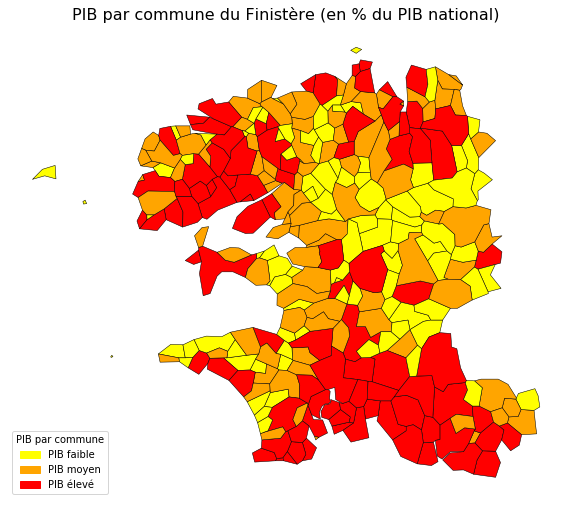

In [11]:
# On divise en trois catégories les communes : celles avec un PIB faible, moyen et élevé.
carte_PIB_communes_2022['categorie_pib'] = pd.qcut(carte_PIB_communes_2022['pibtot2022'], q=3, labels=['PIB faible', 'PIB moyen', 'PIB élevé'])

# Définir la taille de la figure
fig, ax = plt.subplots(1, 1, figsize=(10, 12))


couleurs = {'PIB faible':'yellow', 'PIB moyen':'orange', 'PIB élevé':'red'}

# Tracer la carte
carte_PIB_communes_2022.plot(column='categorie_pib',  # colonne à visualiser
              linewidth=0.5,          # contours des communes
              edgecolor='black',
              color=carte_PIB_communes_2022['categorie_pib'].map(couleurs),
              legend=True,            # afficher la légende
              ax=ax)

# Ajouter un titre
ax.set_title("PIB par commune du Finistère (en % du PIB national)", fontsize=16)

# Créer les patches pour la légende
patches = [mpatches.Patch(color=couleurs[key], label=key) for key in couleurs]

# Ajouter la légende
ax.legend(handles=patches, title="PIB par commune", loc='lower left')

# Supprimer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()

fig.savefig("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Graphiques/pib_commune.png", dpi=300, bbox_inches='tight')
